# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import calplot
import requests
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [46]:
# Load data
df_crimes = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

# Create a datetime column
df_crimes['datetime'] = pd.to_datetime(df_crimes['Date'] + ' ' + df_crimes['Time'])

# Drop year 2018 (it's incomplete)
df_crimes = df_crimes[df_crimes['datetime'].dt.year != 2018]

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [47]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

__First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).__


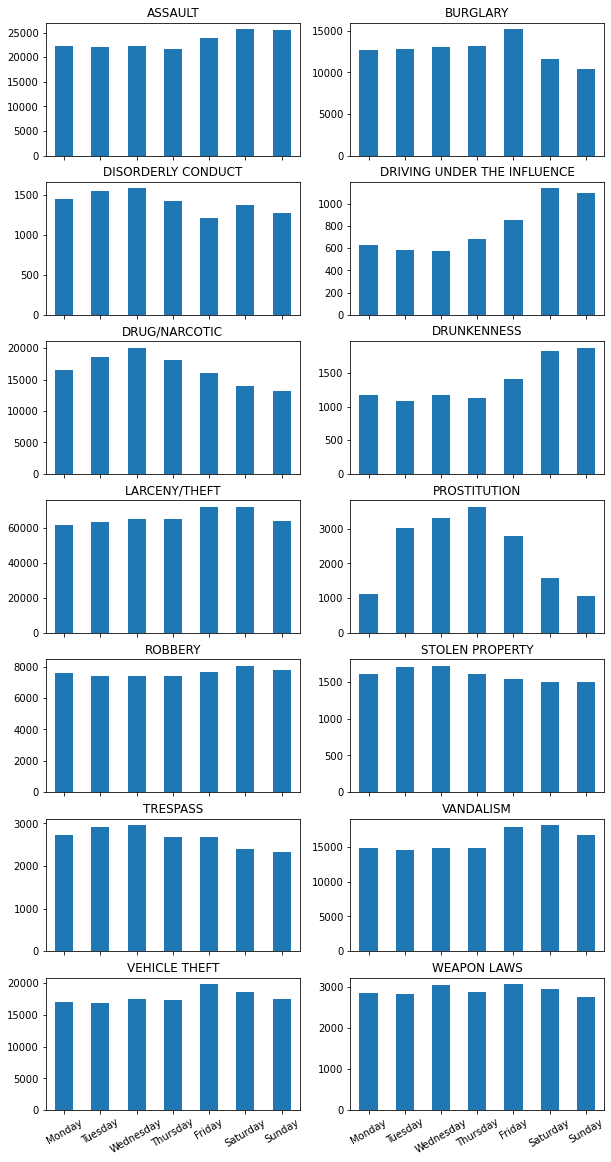

In [48]:
# Week-day plots

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    df_day = df_temp.DayOfWeek.value_counts().reindex(days)
    df_day.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30)

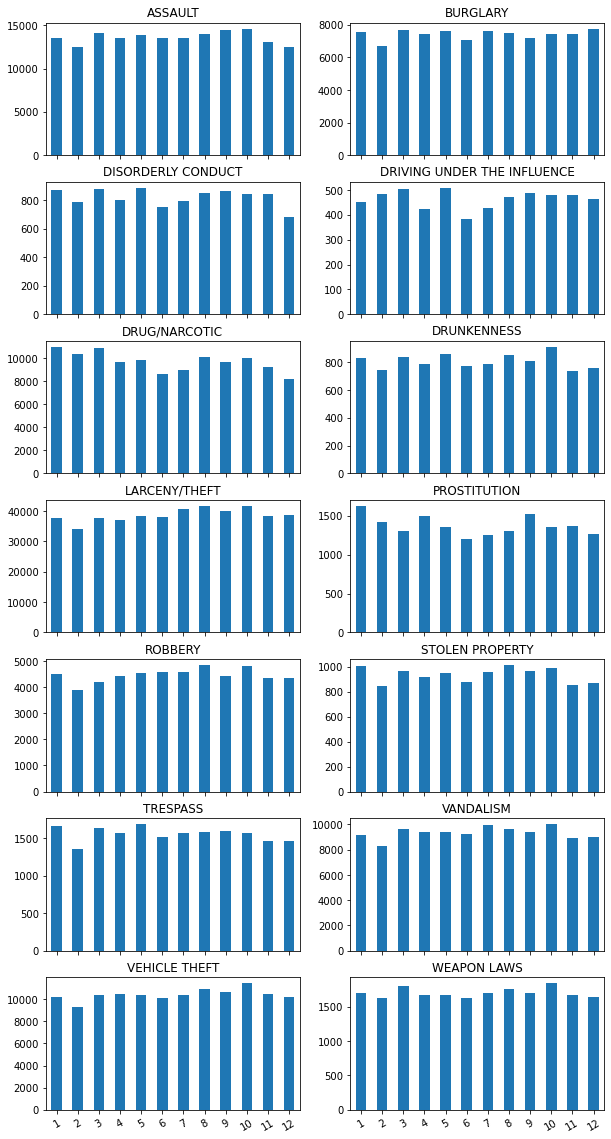

In [49]:
# Months plots

months = np.arange(1,13)
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    df_month = df_temp.datetime.dt.month.value_counts().reindex(months)
    df_month.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30)

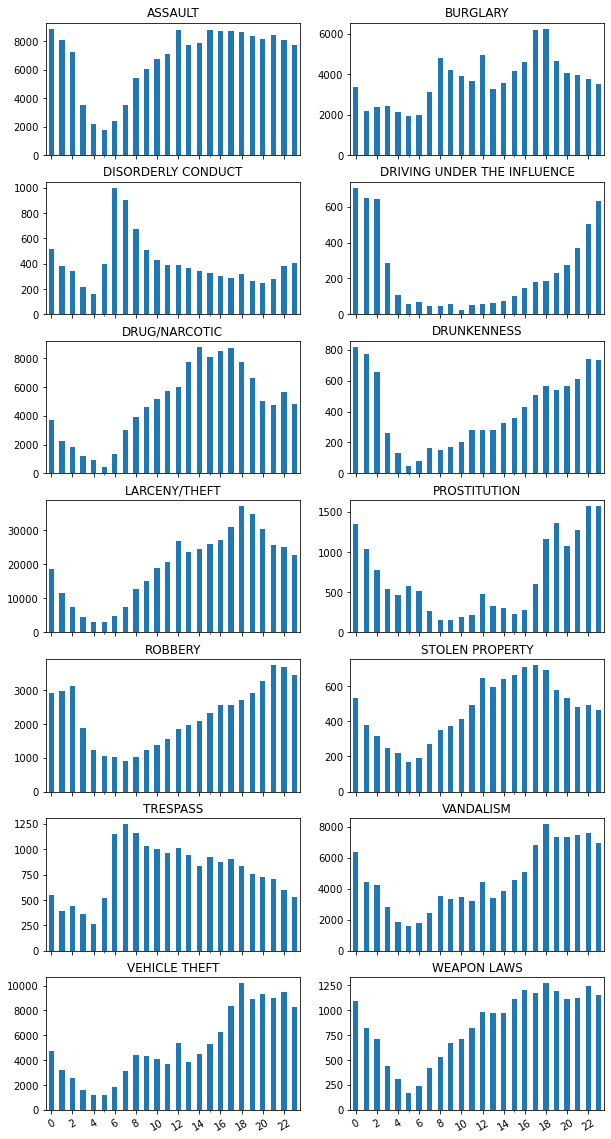

In [50]:
# 24-hour cycle

hours = np.arange(24)
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    # Calculate the number of crimes for each hour of the week, and reindex the result to include all 168 hours
    df_hour = df_temp.datetime.dt.hour.value_counts().reindex(hours) 
    # Set the x-tick labels to be the hours that are divisible by 12
    xticks=[i for i in df_hour.index if i% 2 == 0] 
    df_hour.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30,xticks=xticks)

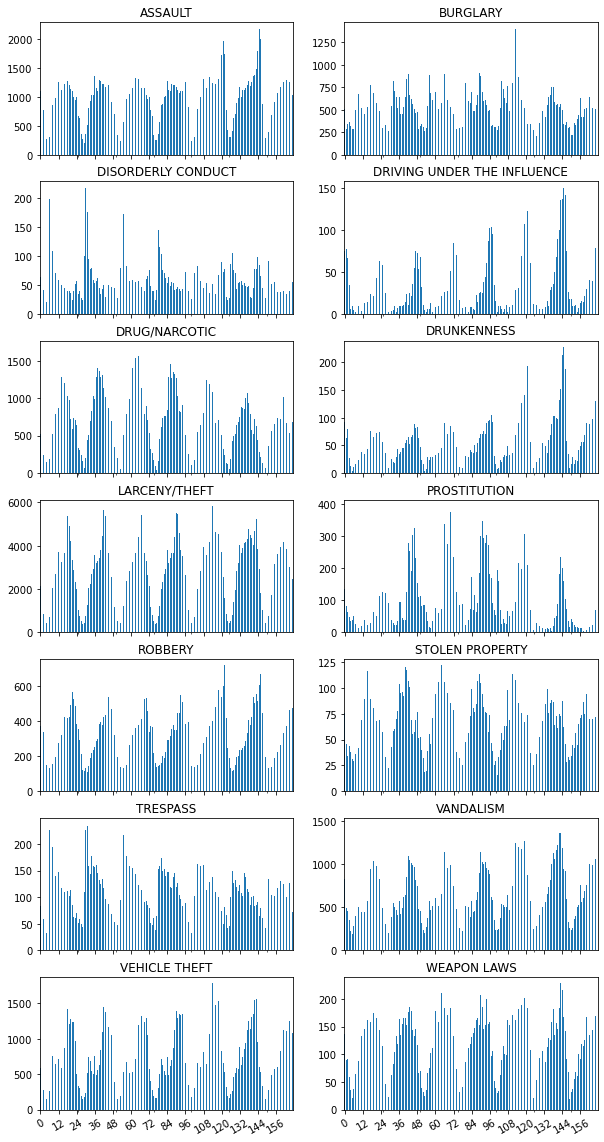

In [51]:
# 168-hour plot

# Add column HourOfWeek which starts at 0 (Monday 0:00) and goes to 167 (Sunday 23:00)
dayToHour = {'Monday':0, 'Tuesday':24, 'Wednesday':48, 'Thursday':72, 'Friday':96, 'Saturday':120, 'Sunday':144}
df_crimes['HourOfWeek'] = df_crimes['DayOfWeek'].replace(dayToHour) + df_crimes['datetime'].dt.hour

week_hours = np.arange(168)
fig, axs = plt.subplots(7,2, sharex=True, figsize=(10,20))

for idx, i in enumerate(sorted(focuscrimes)):
    df_temp = df_crimes[df_crimes.Category == i]
    df_hour = df_temp.HourOfWeek.value_counts().reindex(week_hours)
    xticks=[i for i in df_hour.index if i% 12 == 0]
    df_hour.plot.bar(ax = axs[int(idx/2), idx%2], title=i,rot=30,xticks=xticks)

__Next choose a crime type that you like and create a calendar plot (Week 2, Part 4).__


Days with no crimes: DatetimeIndex(['2007-12-16', '2008-08-01', '2009-06-10', '2017-01-26',
               '2017-08-22', '2017-08-27'],
              dtype='datetime64[ns]', freq=None)


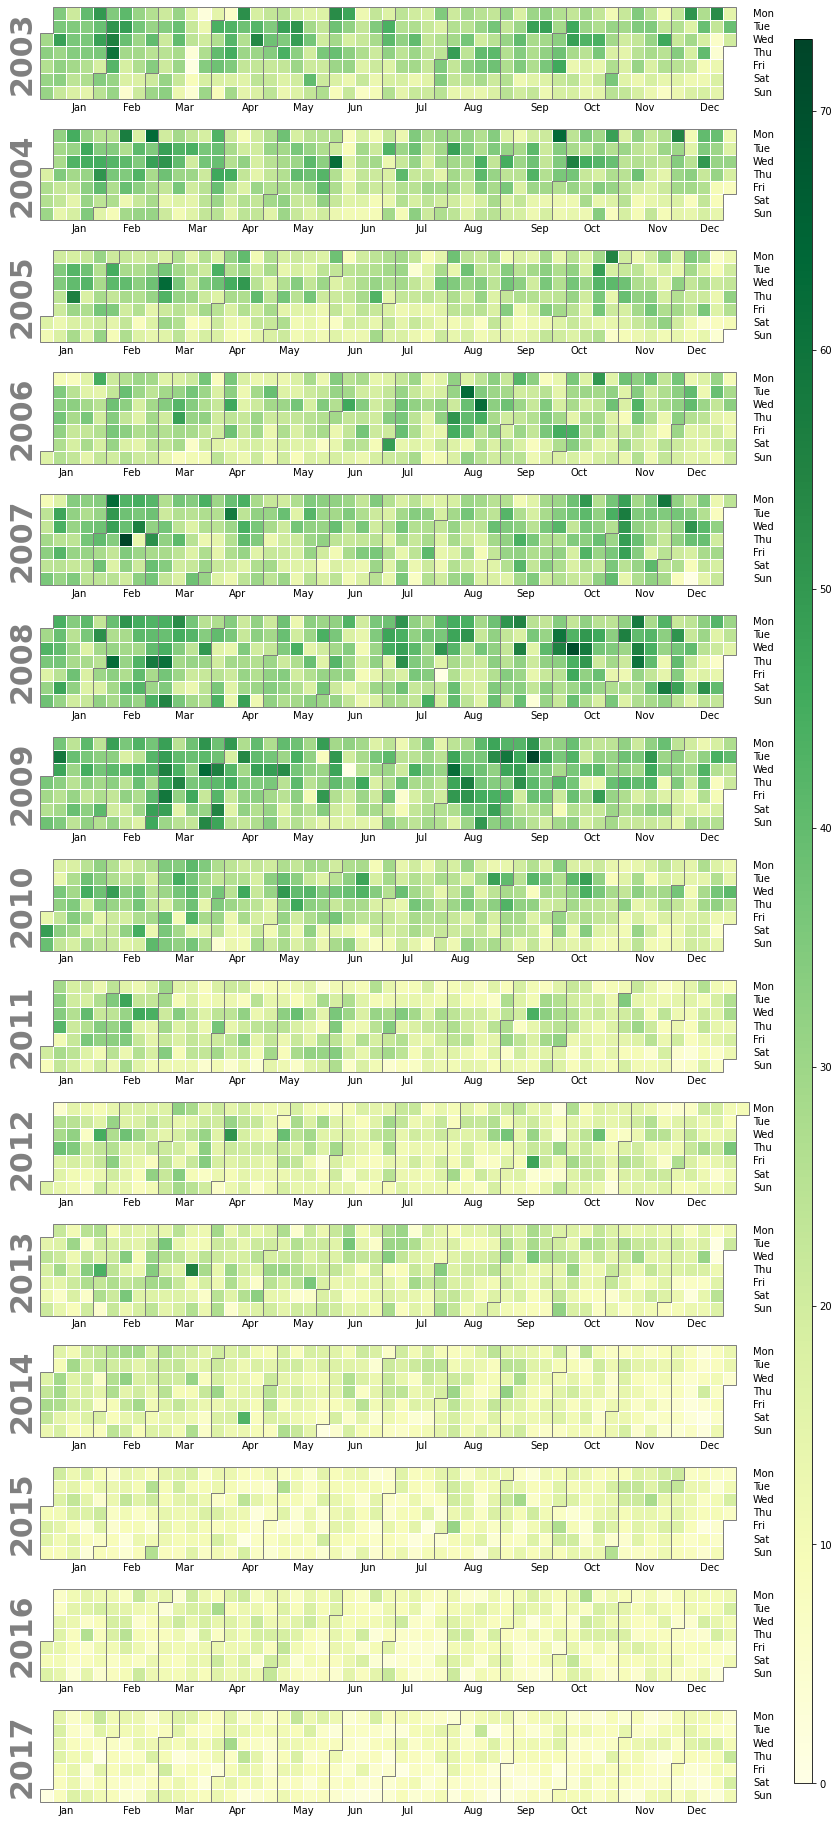

In [52]:
# Get only drug crimes
df_drug = df_crimes[df_crimes.Category == 'DRUG/NARCOTIC']

# Create a date_range of all the elements
my_range = pd.date_range(start="2003-01-01", end="2017-12-31", freq='D')

# Drop dates where no crime occurs
empty_days = my_range.difference(sorted(df_drug.datetime.dt.date.unique()))
print("Days with no crimes:", empty_days)
my_range = my_range.drop(empty_days)

# Make a pandas series of the drug crime counts for each date
counts = np.array(df_drug.datetime.dt.date.value_counts().sort_index())
events = pd.Series(counts, index=my_range)

# Plot
calplot.calplot(events, cmap='YlGn');

 __Don't forget to comment on patterns you observe.__

We can see a clear trend in the decrease of narcotic crimes related as we go further away in time, which is quite shocking for us as we would have thought these crimes were instead on the rise!

After researching, we can see the support of this trend by the fact that the city has decided to undertake "progressives" policies. As Lee Ohanian describes in this <a href="https://www.hoover.org/research/san-franciscos-progressive-drug-policies-kill-hundreds-annually">article</a> _"Harm-reduction policies are expanding drug use among youths through the dispensation to homeless adolescents of “safe snorting kits” and “safe smoking kits” for crack use. As if any crack use could be considered “safe.”"_ 

This might explain the decrease in drug or narcotic related crimes.

__Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4)__

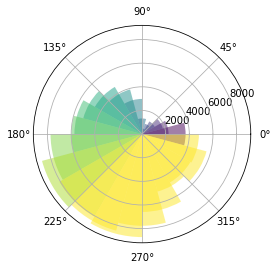

In [53]:
#24 Hours polar plot
# Get Drug/Narcotic crimes
df_drugs = df_crimes[df_crimes.Category == 'DRUG/NARCOTIC']

#Set range of 24 
hours = np.arange(24)

#Save colors
colors = plt.cm.viridis(hours / 16)

# Compute pie slices
N = 24 #Bar num

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / 6

# Get number of robberies for each hour
num_drugs = df_drugs.datetime.dt.hour.value_counts().reindex(hours)

# Plot
ax = plt.subplot(projection='polar')
ax.bar(theta, num_drugs, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

 __Again, don't forget to comment as you would in a figure text.__

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

__Mention 10 examples of ways we can encode data.__

* Examples:
1. Length of a rectangle when ploting numeric data values, that are represented by it.

2. Nodes and edges that represent values and their connection with each other respectively.

3. Coordenates X and Y are represent by encodings such as the position

4. Area to respresent data defined by area under a curve 

5. Color intensity

6. Angles 

7. Shape 

8. Volume 

9. Density

10. Lines

__Are all encodings created equally? Why not? Can you think of an example from the previous lectures?__

* Not all encodings are created equally. Because not all econdings serve the same purpose. While some encodings might be better to represent some data than others.

__Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?__

* Examples of 3 encodings that are difficult to read:
1. Angles (extra example, Pie chart).
2. Areas
3. Color intensity. A heat map can be very difficult to read and interpret if the colors are nor very well defined and differentiated. 
4. Extra: Nodes and edges. Networks can be very difficult to read and interpret as well when they become very populated and not all nodes and edges can be identified clearly. 

__Explain in your own words: What is the problem with pie-charts?__

* Pie charts are not a good representation of data because the quantity of categories you can add is very limited, the more the messier and difficult to understand the chart becomes. They can be misleading when comparing between each other, especially if the slizes are similar in size, as we are comparing by highest angle value, it can be hard, for example, to define what is the highest value-category. Something that in visualizations such as a barchart, it would be very easy to note as the bars representing the categories are aligned. Lastly, the use of this chart is very limited, for example, you cannot show time series.


## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

In [54]:
link = "https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson"
f = requests.get(link)
Districts = f.json()

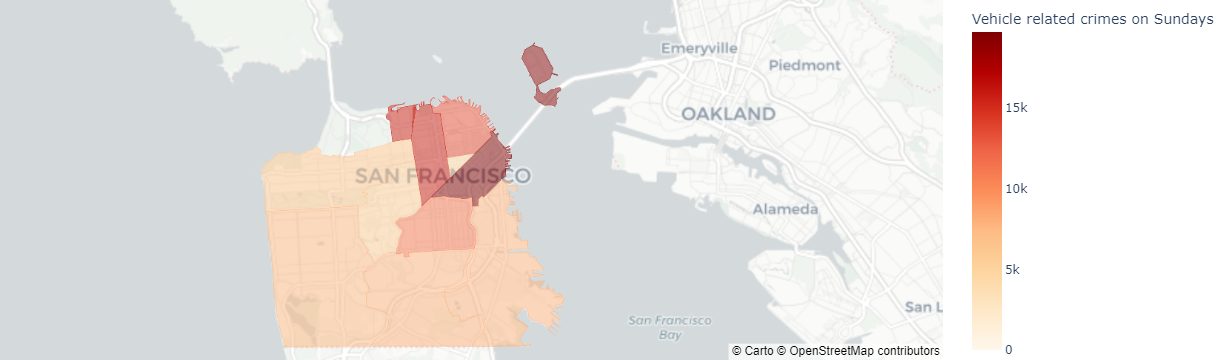

In [55]:
# Take only vehicle theft crimes on sundays
df_car = df_crimes[df_crimes.Category.isin(['VEHICLE THEFT','LARCENY/THEFT', 'VANDALISM', 'STOLEN PROPERTY'])]
df_car = df_car[df_car.DayOfWeek == 'Sunday']

# Make dictionary of number of vehicle thefts per district
sunday_vehicle_theft = dict(df_car.PdDistrict.value_counts())

# Convert to a DataFrame
df_car_district = pd.DataFrame(list(zip(list(sunday_vehicle_theft.keys()), list(sunday_vehicle_theft.values()))),
                       columns=['DISTRICT', 'unemp'])

# Plot
fig = px.choropleth_mapbox(df_car_district, geojson=Districts, locations='DISTRICT', color='unemp',
                           color_continuous_scale="orRd",
                           range_color=(0, max(sunday_vehicle_theft.values())),
                           mapbox_style="carto-positron",
                           zoom=10.4, 
                           center = {"lat": 37.77687, "lon": -122.40532},
                           opacity=0.5,
                           labels={'unemp':'Vehicle related crimes on Sundays'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_line_width=0)
fig.show()

__Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?__

* Best place to park your car on Sundays is in dictrict Tenderloin, and the worst place to park it is in district Ingleside

__Using visualizations can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):__
   - __Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?__
   
   ??. Also a heatmap with the coordinates and without any border between the districts could very well decrease the difference betweeen them.
   - __Why do you think perceptual errors are a problem? Try to think of a few examples.__
   
   Perceptual errors are indeed an issue in the visualization. For example, we can see some contrast in the first map plot. As an instance, the "Central" district might not be seen as such a dangerous place as it is sorrounded by much more darker neigbourhoods such as Southern and Northern, but it has almost the double of crimes compared to Bayview. This contrast issue effect might not be as powerful as it can be, as we only have a few districts, but it can be worse in a larger scale.
   Also, for people with more knowledge about the San Francisco City, we can possibly observe stereotyping as we are talking about crimes and geographical distribution. We have to take into account the discrimnation and racist that is present in the society, as an instance.

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.

__Find your own example of human noise in the data and visualize it.__

Just like we have researched on the density of crime category and district, we are going to do something similar but with the Resolution of the crime instead, such as, "ARREST, BOOKED", "COMPLAINANT REFUSES TO PROSECUTE" and others. 

We are looking for geographical patterns that might indicate possibles racial or ethnicallity bias.

First, we'll have a look at the distribution of the resolution categories.

In [56]:
df_crimes.Resolution.value_counts(ascending=False)

NONE                                      1329101
ARREST, BOOKED                             497994
ARREST, CITED                              153357
PSYCHOPATHIC CASE                           29060
UNFOUNDED                                   22523
LOCATED                                     21205
COMPLAINANT REFUSES TO PROSECUTE             7583
NOT PROSECUTED                               7556
DISTRICT ATTORNEY REFUSES TO PROSECUTE       7122
PROSECUTED BY OUTSIDE AGENCY                 4929
EXCEPTIONAL CLEARANCE                        3954
PROSECUTED FOR LESSER OFFENSE                  82
Name: Resolution, dtype: int64

As we can see, arrests are by far the most common resolution category.

Now, we will calculate the relative probabilities of seeing each type of resolution in the dataset as a whole. 

In [57]:
df_distribution=pd.DataFrame(df_crimes['Resolution'].value_counts()/len(df_crimes))
df_distribution.rename({'Resolution':'Freq'},axis=1,inplace=True)

Next, we calculate that same probability distribution but for each PD district, let's call that P(resolution|district).

In [58]:
df_auxi=pd.DataFrame(df_crimes.groupby(by=['PdDistrict','Resolution'])['PdId'].count().unstack().reset_index())
df_auxi['sum']=df_auxi.sum(axis=1)
df_auxi2=df_auxi.copy()
del df_auxi['PdDistrict'] 
df_auxi3 = df_auxi.loc[:,"ARREST, BOOKED":"UNFOUNDED"].div(df_auxi["sum"], axis=0)
df_auxi3['PdDistrict']=df_auxi2['PdDistrict']
df_auxi3.set_index('PdDistrict',inplace=True)

Now we look at the ratio P(reolution|district)/P(resolution). That ratio is equal to 1 if the resolution occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime resolution occurs more frequently within that district. If it's smaller than one, it means that the crime resolution is rarer within the district in question than in the city as a whole.

In [59]:
df_auxi3=df_auxi3.append(df_distribution.T)
df_auxi_norm=df_auxi3.loc[:,"ARREST, BOOKED":"UNFOUNDED"].div(df_auxi3.loc["Freq"], axis=1)
df_auxi_norm.drop(df_auxi_norm.tail(1).index,inplace=True)

In [60]:
df_auxi_norm

ARREST, BOOKED  ARREST, CITED  COMPLAINANT REFUSES TO PROSECUTE  \
BAYVIEW           0.971592       1.303328                          1.805209   
CENTRAL           0.693282       0.761550                          0.748618   
INGLESIDE         0.757154       1.057039                          1.435064   
MISSION           1.222816       1.306492                          0.955981   
NORTHERN          0.832611       0.778184                          0.791907   
PARK              0.880725       0.820277                          0.927603   
RICHMOND          0.586228       0.620924                          0.996030   
SOUTHERN          1.038169       0.997193                          0.712649   
TARAVAL           0.644565       0.762396                          1.238684   
TENDERLOIN        2.058199       1.279670                          0.803099   

            DISTRICT ATTORNEY REFUSES TO PROSECUTE  EXCEPTIONAL CLEARANCE  \
BAYVIEW                                   1.614297               0.802754   
CENTRAL                                   0.847232               0.932719   
INGLESIDE                                 1.547733               1.380540   
MISSION                                   0.849080               0.589369   
NORTHERN                                  0.883638               0.728987   
PARK                                      0.900354               0.723265   
RICHMOND                                  1.161249               1.604560   
SOUTHERN                                  0.787107               1.409474   
TARAVAL                                   1.153524               1.347071   
TENDERLOIN                                0.656411               0.618365   

             LOCATED      NONE  NOT PROSECUTED  PROSECUTED BY OUTSIDE AGENCY  \
BAYVIEW     1.393005  0.973952        0.785417                      0.797086   
CENTRAL     0.602345  1.151049        1.362038                      1.077278   
INGLESIDE   1.358529  1.072437        0.918181                      1.259881   
MISSION     1.012373  0.883305        0.746631                      0.695714   
NORTHERN    0.713260  1.098829        1.001368                      1.000635   
PARK        2.207244  1.046755        0.928567                      0.864889   
RICHMOND    0.967931  1.188013        1.231993                      1.225870   
SOUTHERN    0.756309  0.988371        1.173468                      1.078670   
TARAVAL     1.432836  1.144299        1.217741                      1.738974   
TENDERLOIN  0.474560  0.583307        0.642678                      0.523605   

            PROSECUTED FOR LESSER OFFENSE  PSYCHOPATHIC CASE  UNFOUNDED  
BAYVIEW                          1.765203           0.561425   0.978682  
CENTRAL                          0.470945           0.818595   1.108476  
INGLESIDE                        0.715795           0.908099   1.072634  
MISSION                          1.079205           1.146789   0.957715  
NORTHERN                         2.050498           0.932371   0.886593  
PARK                                  NaN           1.107569   0.988173  
RICHMOND                         1.381627           0.837550   1.590356  
SOUTHERN                         0.665011           1.144849   0.921963  
TARAVAL                          1.001878           1.034699   1.084541  
TENDERLOIN                       0.552171           1.351252   0.797085

Now, we will graph the Arrested and cited ratio with Folium, just like in the previous exercises.

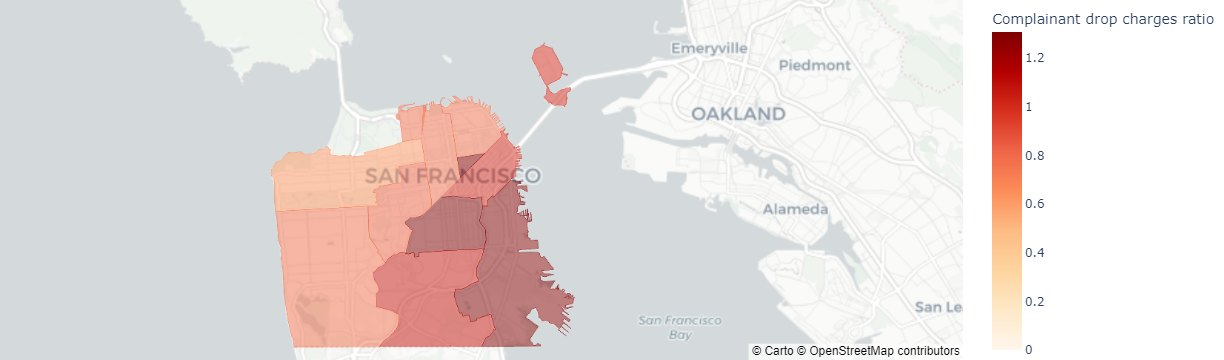

In [61]:
# Make dictionary of number of vehicle thefts per district

arrested = dict(df_auxi_norm["ARREST, CITED"])

# Convert to a DataFrame
df_car_district = pd.DataFrame(list(zip(list(arrested.keys()), list(arrested.values()))),
                       columns=['DISTRICT', 'unemp'])

# Plot
fig = px.choropleth_mapbox(df_car_district, geojson=Districts, locations='DISTRICT', color='unemp',
                           color_continuous_scale="orRd",
                           range_color=(0, max(arrested.values())),
                           mapbox_style="carto-positron",
                           zoom=10.4, 
                           center = {"lat": 37.77687, "lon": -122.40532},
                           opacity=0.5,
                           labels={'unemp':'Complainant drop charges ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_line_width=0)
fig.show()

We can see that Tenderloin and other southeastern districts seems to have the highest ratio of arrest in relation to the crimes.

In the following image, we can see the white people density map of San Francisco. This image was taken from this <a href="https://statisticalatlas.com/place/California/San-Francisco/Race-and-Ethnicity">page</a>.

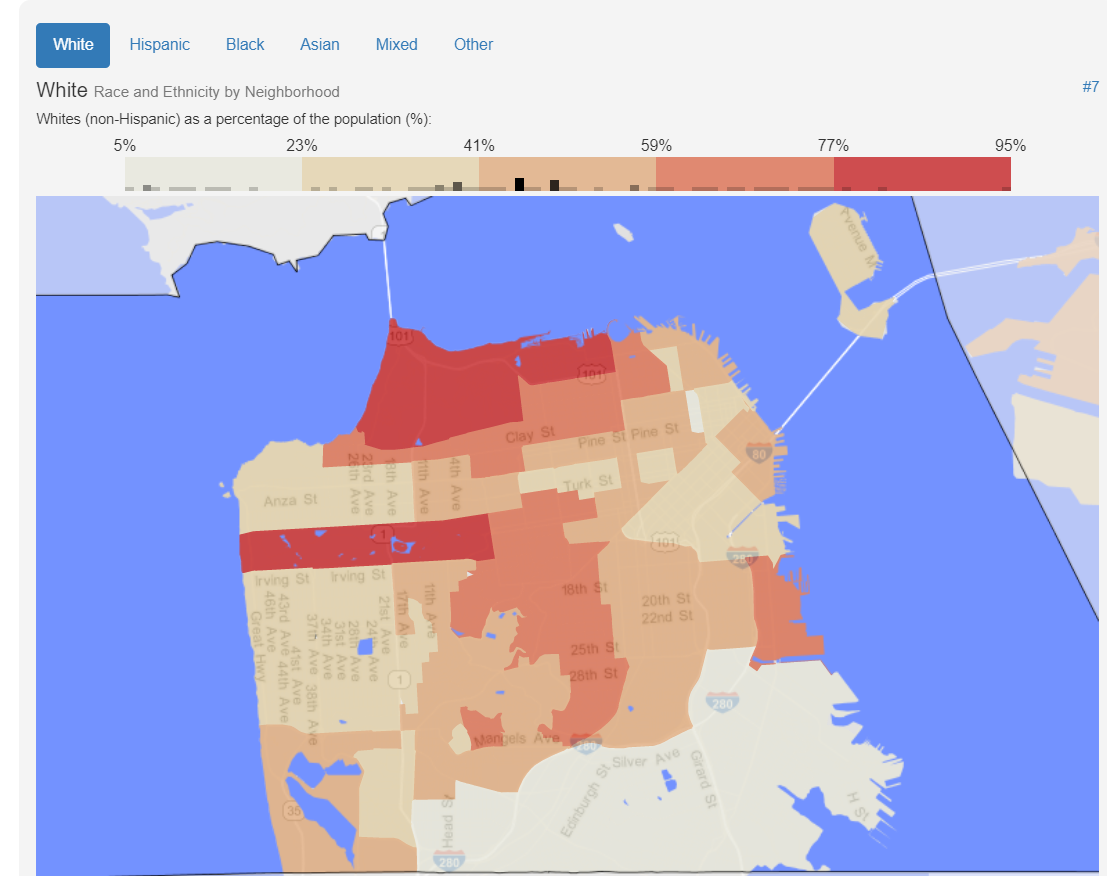

As these two images indicate, it seems to be that when the share of white population is bigger, the density of arrests tends to be lower. This might be explained by the very well-known <a href="https://en.wikipedia.org/wiki/Race_in_the_United_States_criminal_justice_system"> United States racist criminal justice system</a>.


Nevertheless, we can't afirm with this preliminary observation that such a trend exists in San Francisco, we need a deeper socio-economical investigation in our opinion, but it makes a good visualization of possible biases (or __human noise__) that can occur among datasets which include social information.

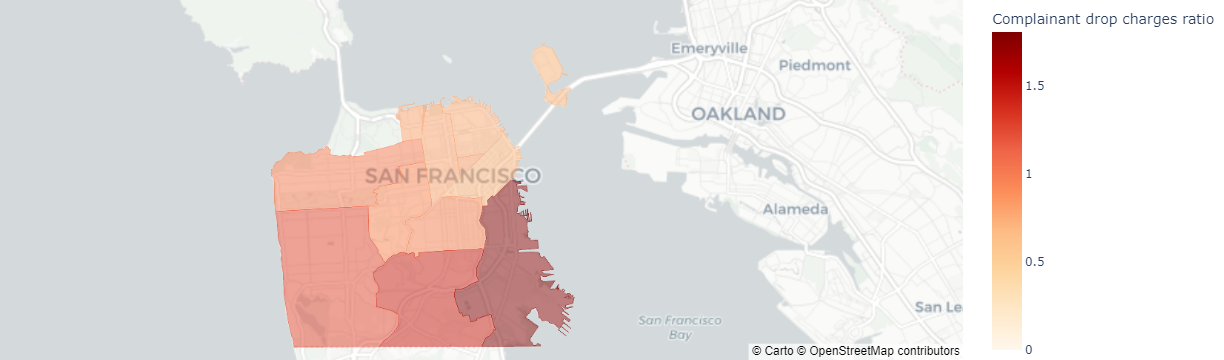

In [62]:
# Make dictionary of number of vehicle thefts per district
arrested = dict(df_auxi_norm["COMPLAINANT REFUSES TO PROSECUTE"])

# Convert to a DataFrame
df_car_district = pd.DataFrame(list(zip(list(arrested.keys()), list(arrested.values()))),
                       columns=['DISTRICT', 'unemp'])

# Plot
fig = px.choropleth_mapbox(df_car_district, geojson=Districts, locations='DISTRICT', color='unemp',
                           color_continuous_scale="orRd",
                           range_color=(0, max(arrested.values())),
                           mapbox_style="carto-positron",
                           zoom=10.4, 
                           center = {"lat": 37.77687, "lon": -122.40532},
                           opacity=0.5,
                           labels={'unemp':'Complainant drop charges ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_line_width=0)
fig.show()

As we can see in the following image, in the Bayview Area there is much bigger density Black people. This image was taken from this <a href="https://statisticalatlas.com/place/California/San-Francisco/Race-and-Ethnicity">page</a>

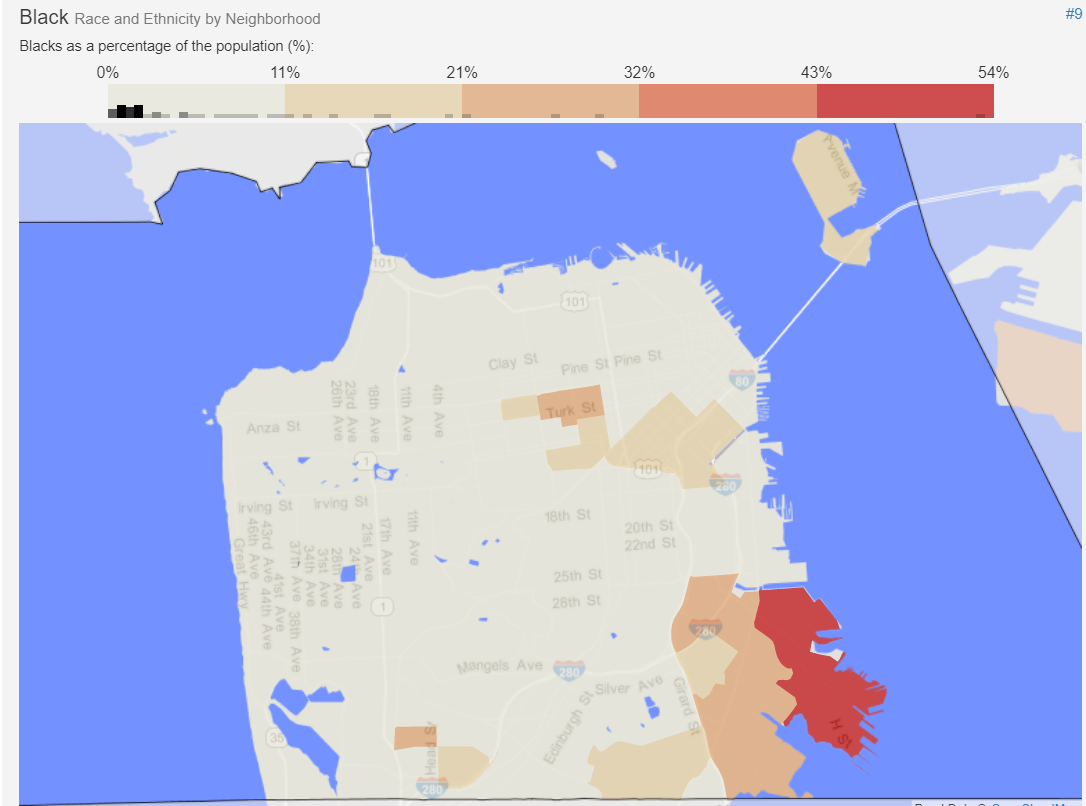

We can see, as the black people density increases, so does the complainant drops ratio. This might be best explained by the lack of resources to get involved in the judicial process, or the lack of trust in the system.

Of course, we can't state that a bias exists with this preliminary study, but we think it is good example for us, data analysts, to be aware of possible bias (in this case, socio-economical) that might be tricky or difficult to evaluate or discover.